В этом задании мы будем работать с датасетом, в котором приведены данные по мошенничеству с
кредитными данными: Credit Card Fraud Detection 
Ознакомьтесь с описанием и скачайте датасет creditcard.csv с сайта https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
Данный датасет является примером несбалансированных данных, так как мошеннические операции с
картами встречаются реже обычных.
Импортируйте библиотеку Pandas, а также используйте для графиков стиль “fivethirtyeight”.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Загрузка датасета
df = pd.read_csv('creditcard.csv') 
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Посчитайте с помощью метода value_counts количество наблюдений для каждого значения целевой
переменной Class и примените к полученным данным метод plot, чтобы построить столбчатую
диаграмму

In [3]:
# Подсчет количества наблюдений для каждого значения Class
class_counts = df['Class'].value_counts()
class_counts

Class
0    284315
1       492
Name: count, dtype: int64

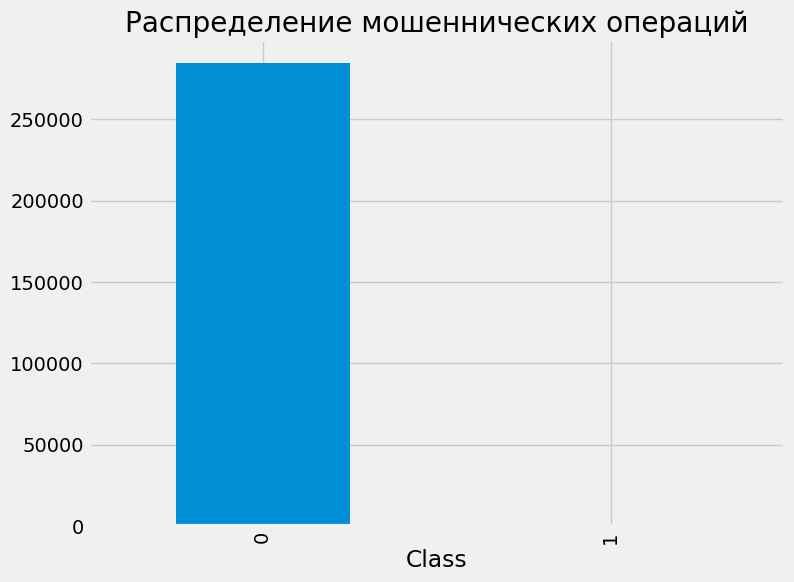

In [6]:
# Столбчатая диаграмма
plt.figure(figsize=(8, 6))  # Устанавливаем размер фигуры
class_counts.plot(kind='bar')
plt.title('Распределение мошеннических операций')
# plt.xlabel('Класс')
# plt.ylabel('Количество наблюдений')
plt.show()

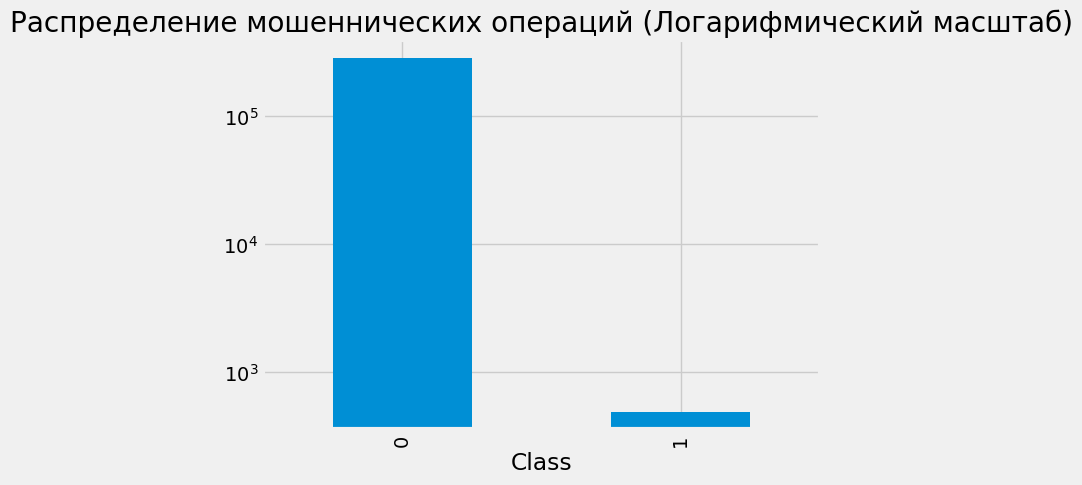

In [10]:
class_counts.plot(kind='bar',  logy=True)  # logy=True включает логарифмический масштаб
class_counts.plot(kind='bar')
plt.title('Распределение мошеннических операций (Логарифмический масштаб)')
plt.show()

На следующем графике постройте две гистограммы по значениям признака V1 - одну для
мошеннических транзакций (Class равен 1) и другую - для обычных (Class равен 0).
 Подберите значение аргумента density так, чтобы по вертикали графика было расположено не число
наблюдений, а плотность распределения  density=True
Число бинов должно равняться 20 для обеих гистограмм, а коэффициент alpha сделайте равным 0.5, чтобы гистограммы были полупрозрачными и не загораживали друг друга.stacked=False

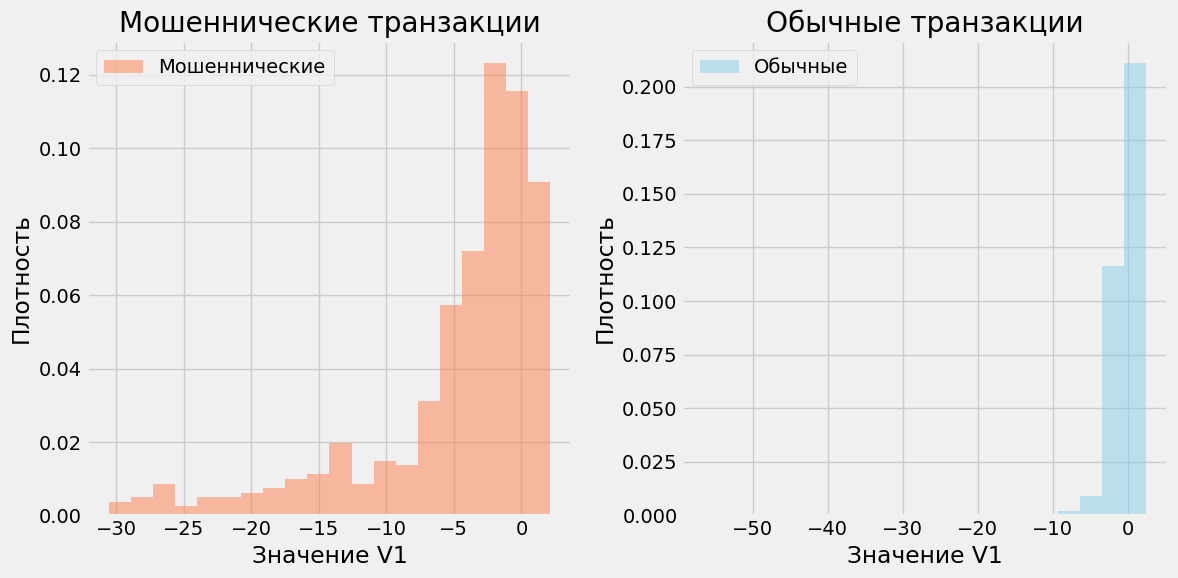

In [30]:
# Фильтрация данных по классу
fraud_data = df[df['Class'] == 1]['V1']
normal_data = df[df['Class'] == 0]['V1']
# Построение гистограмм
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 строка, 2 столбца

ax[0].hist(fraud_data, bins=20, alpha=0.5, label='Мошеннические', color='coral', density=True)
ax[1].hist(normal_data, bins=20, alpha=0.5, label='Обычные', color='skyblue', density=True)

ax[0].set_title('Мошеннические транзакции')
ax[1].set_title('Обычные транзакции')

for a in ax:
    a.set_xlabel('Значение V1')
    a.set_ylabel('Плотность')
    a.legend()

plt.tight_layout()
plt.show()